<a href="https://colab.research.google.com/github/4cea2/7506R-2C2023-GRUPO26/blob/main/7506R_TP1_GRUPO26_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo practico 1**

**Grupo**: 26

**Integrantes**:

Garcia Nicolas

Vallcorba Agustin

Carbajal Robles, Kevin Emir

## **Librerias y carga del data set**


In [ ]:
#LIBRERIAS
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy.linalg import sqrtm

In [ ]:
#IMPORTAMOS EL DATASET
df = pd.read_csv("https://drive.google.com/u/0/uc?id=1tjlunFxE63XIpYjWk8SPm2XPxixu8SW4&export=download")

#DataSet donde vamos a filtrar
df_copia = df.copy()

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


In [ ]:
df.shape

(61913, 31)

## **Tipos de datos**

In [ ]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Campos:
*   hotel: Nombre del hotel.

  Cualitativa (nominal)
*   lead_time : Número de días que transcurrieron entre la fecha de entrada de la reserva en el PMS y la fecha de llegada.
  
  Cuantitativa (discreta)
*   arrival_date_year: Año que llegaron.
  
  Cuantitativa (discreta)
*   arrival_date_month: Mes que llegaron.
  
  Cualilativa (nominal)
*   arrival_date_week_number: Semana que llegaron.

  Cuantitativa (discreta)
*   arrival_date_day_of_month: Dia del mes que llegaron.

  Cuantitativa (discreta)
*   stays_in_weekend_nights: Noches del fin de semana.

  Cuantitativa (discreta)
*   stays_in_week_nights: Noches de lunes-viernes.

  Cuantitativa (discreta)
*   adults: Cantidad de adultos.

  Cuantitativa (discreta)
*   children: Cantidad de niños.

  Cuantitativa (discreta)
*   babies: Cantidad de bebes.

  Cuantitativa (discreta)
*   meal: Tipo de comida reservada. Las categorías se presentan en paquetes de comida de hospitalidad estándar:

  Indefinido/SC: sin paquete de comida;
  
  BB – Alojamiento y desayuno.
  
  HB – Media pensión (desayuno y otra comida – normalmente cena).
  
  FB – Pensión completa (desayuno, almuerzo y cena).

  Cualitativa (nominal)
*   country: Pais de origen.

  Cualitativa (nominal)
*   market_segment: Designación del segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".

  Cualitativa (nominal)
*   distribution_channel: Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".

  Cualitativa (nominal)
*   is_repeated_guest: Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0).

  Cuantitativa (discreta)
*   previous_cancellations: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

  Cuantitativa (discreta)
*   previous_bookings_not_canceled: Número de reservas anteriores no cancelado por el cliente antes de la reserva actual.

  Cuantitativa (discreta)
*   reserved_room_type:Código del tipo de habitación reservada. Se presenta el código en lugar de la designación por motivos de anonimato.

  Cualitativa (nominal)
*   assigned_room_type: Código del tipo de habitación asignada a la reserva. En ocasiones, el tipo de habitación asignada difiere del tipo de habitación reservada debido a motivos de operación del hotel (por ejemplo, overbooking) o por solicitud del cliente. Se presenta el código en lugar de la designación por motivos de anonimato.

  Cualitativa (nominal)
*   booking_changes: Número de cambios/modificaciones realizadas en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento del check-in o cancelación.

  Cuantitativa (discreta)
*   deposit_type:Indicación sobre si el cliente realizó un depósito para garantizar la reserva.     Esta variable puede asumir tres categorías:

  Sin depósito: no se realizó ningún depósito.

  Sin reembolso: se realizó un depósito en el valor del coste total de la estancia.

  Reembolsable: se realizó un depósito con un valor inferior al coste total de la estancia.

  Cualitativa (nominal)
*   agent: DNI de la agencia de viajes que realizó el reservando.

  Cuantitativa (discreta)
*   company: DNI de la empresa/entidad que realizó la reserva o responsable del pago de la misma. Se presenta identificación en lugar de designación por razones de anonimato.

  Cuantitativa (discreta)
*   days_in_waiting_list: Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.

  Cuantitativa (discreta)
*   customer_type: Tipo de reserva, asumiendo una de cuatro categorías:

  Contrato - cuando la reserva tiene un adjudicación u otro tipo de contrato asociado a él.

  Grupo – cuando la reserva es asociada citado a un grupo.

  Transitorio – cuando la reserva no es parte de un grupo o contrato, y no es asociado a otras reservas transitorias.

  Fiesta transitoria – cuando la reserva es transitorio, pero es asociado.

  Cualitativa (nominal)
*   adr: Tarifa diaria promedio.

  Cuantitativa (continua)
*   required_car_parking_spaces: Número de plazas de aparcamiento solicitadas por el cliente.

  Cuantitativa (discreta)
*   total_of_special_requests: Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).

  Cuantitativa (discreta)
*   id: Identificador de registro.

  Cualitativa (nominal)
*   is_canceled: Valor que indica si la reserva fue cancelada (1) o no (0).
  
  Cuantitativa (discreta)


## **Analisis de calidad de datos**

### **Datos faltantes**

Sabiendo que existen columnas que contienen nulos, calculamos el porcentaje de estos en base a la cantidad de registros.

In [ ]:
#Nos fijamos cual es el porcentaje de nulos que hay en las columnas que los contienen

#Cantidad de registros
cantidad_registros = len(df)

# Obtener una serie booleana que indica columnas con valores nulos
columnas_con_nulos = df.isnull().any()

# Filtrar las columnas que tienen valores nulos
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos].index

# Crear un nuevo DataFrame con las columnas que tienen valores nulos
nuevo_df = df[columnas_con_nulos]

for nombre_columna, columna in nuevo_df.items():
  valores_Nulos = columna.isnull().sum()
  print("El porcentaje de valores nulos para la columna {} es aproximadamente: {}% ".format(nombre_columna, round(valores_Nulos * 100 / cantidad_registros, 2)))



El porcentaje de valores nulos para la columna children es aproximadamente: 0.01% 
El porcentaje de valores nulos para la columna country es aproximadamente: 0.36% 
El porcentaje de valores nulos para la columna agent es aproximadamente: 12.74% 
El porcentaje de valores nulos para la columna company es aproximadamente: 94.91% 


En funcion de los valores faltantes con respecto al total de cada columna, graficamos y visualizamos su porcentaje.

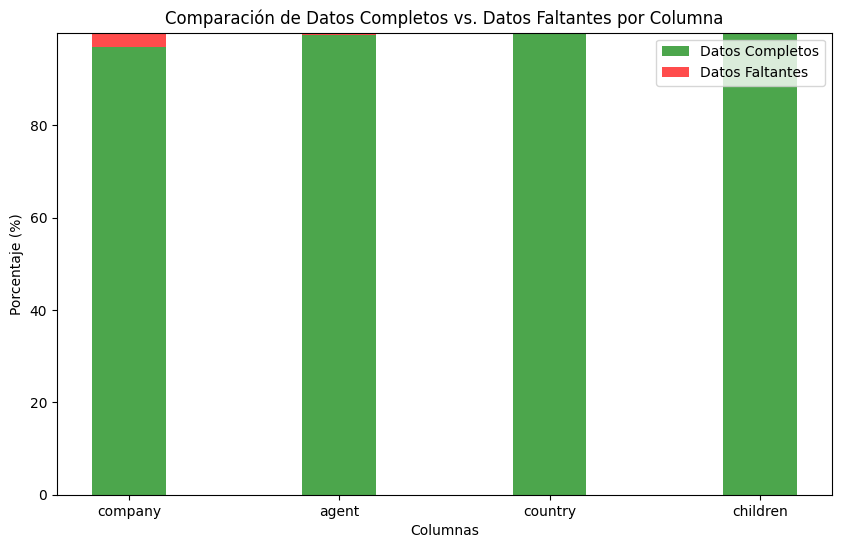

Porcentaje de datos faltantes en company: 3.06%
Porcentaje de datos faltantes en agent: 0.41%
Porcentaje de datos faltantes en country: 0.01%
Porcentaje de datos faltantes en children: 0.00%


In [ ]:
columnas_objetivo = ['company', 'agent', 'country', 'children']

# Inicializar listas para almacenar los porcentajes de datos faltantes y completos
porcentajes_faltantes = []
porcentajes_completos = []

# Calcular el número total de datos en el dataset
total_datos = df.size

# Calcular los porcentajes para cada columna de interés
for columna in columnas_objetivo:
    datos_faltantes = df[columna].isnull().sum()
    porcentaje_faltantes = (datos_faltantes / total_datos) * 100
    porcentaje_completos = 100 - porcentaje_faltantes
    porcentajes_faltantes.append(porcentaje_faltantes)
    porcentajes_completos.append(porcentaje_completos)

# Crear un gráfico de barras apiladas para cada columna de interés
plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = range(len(columnas_objetivo))
plt.bar(indices, porcentajes_completos, bar_width, label='Datos Completos', color='green', alpha = 0.7)
plt.bar(indices, porcentajes_faltantes, bar_width, bottom=porcentajes_completos, label='Datos Faltantes', color='red', alpha = 0.7)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje (%)')
plt.title('Comparación de Datos Completos vs. Datos Faltantes por Columna')
plt.xticks(indices, columnas_objetivo)
plt.legend()
plt.show()

# Imprimir los porcentajes de datos faltantes en cada columna
for i, columna in enumerate(columnas_objetivo):
    print(f"Porcentaje de datos faltantes en {columna}: {porcentajes_faltantes[i]:.2f}%")

Vemos que la variable **company** es el que toma la mayor parte de datos faltantes con respecto al total (94.91%), seguido de **agent** (0.41%), **country** (0.01%) y **children** (0.00%), aunque estos ultimos no se visualice mucho.

La opcion mas "facil" seria simplemente eliminar estas variables y seguir, pero antes de esto, habria que analizar si estan relacionadas con el target, ya que nos puede predecir el comportamiento de la misma.

Otra opcion es (si decidimos conservar la variable) completar los datos faltantes de la columna en funcion de la informacion que tenga.
Es decir, completando con la mediana, promedio, moda, o constantes.

La ultima opcion seria simplemente eliminar los registros que contienen estos datos faltantes, pero hay que tener cuidado, porque podria llevar consecuencia graves, ya que si la mayoria de los registros contiene datos faltantes, estariamos eliminando un gran porcentaje del dataset.

Empezemos a analizar estas variables con datos faltantes.


*  **company** y **agent**

Segun el papers "Hotel booking demand datasets", proveniente del dataset, nos dice que estas variables pueden adoptar variables tipo NULL, ya que las reservas pueden o no estar hechas por agencias, compañias, etc.

Estos registros que conllevan esos datos faltantes los trataremos de forma diferente, como reservas que **no** fueron hechas por agencias, compañias, entidades y demas. Haremos una **imputacion de datos** en estos casos.

Como la ausencia de los datos esta justificado de alguna forma (aun que no sea por otras variables), las podremos categorizar como tipo de dato faltante **MAR**; faltante al azar.

*  **country** y **children**

Centremonos primero en los registros de country.

Esta variable nos dice el pais de donde surge la reserva, seria algo sin sentido tener estos registros que no sabemos de donde provienen, son muy pocos confiables.
Tambien al ser una variable cualitativa, no sabriamos por cual reemplazarla.
Por ende, tomaremos la decision de eliminarlos por completo.


Por otro lado, tenemos la variable children, que nos cuentan la cantidad de niños que hay en la reserva.
Estos registros que tienen valores NaN son muy pocos, a comparacion de country. Decidiremos reemplazarlos por su mediana, ya que no podemos deducir que valor podria tomar.

### Valores numéricos discretos

 A continuación vamos a analizar en las variables con tipos de datos númericos la existencia de registros mal ingresados o que carecen de sentido segun la naturaleza de lo que representen.

In [ ]:
# Crear una lista de DataFrames individuales para cada columna
resultados = []

#Columnas discretas con rangos especificos:

#Columna que representa los dias del mes, su valor va de 0 a 31 inclusive
columna_dia_mal_ingresados = (df['arrival_date_day_of_month'] <= 0) | (df['arrival_date_day_of_month'] > 32)
resultados.append(pd.DataFrame({'columna': ['arrival_date_day_of_month'], 'valores mal ingresados': [columna_dia_mal_ingresados.sum()]}))

#Los valores no pueden ser mayor al año actual
columna_año_mal_ingresado = (df['arrival_date_year'] > 2023)
resultados.append(pd.DataFrame({'columna': ['arrival_date_year'], 'valores mal ingresados': [columna_año_mal_ingresado.sum()]}))

#Entendemos por semana, la semana del año. El año tiene entre 1 y aproximadamente 52 semanas
columna_semana_mal_ingresados = (df['arrival_date_week_number'] < 0) | (df['arrival_date_week_number'] >= 53)
resultados.append(pd.DataFrame({'columna': ['arrival_date_week_number'], 'valores mal ingresados': [columna_semana_mal_ingresados.sum()]}))

#Columna adultos se entiende que al menos un adulto debe haber por registro
columna_adultos_mal_ingresados = (df['adults'] <= 0)
resultados.append(pd.DataFrame({'columna': ['adults'], 'valores mal ingresados': [columna_adultos_mal_ingresados.sum()]}))

#Columnas de conteo:
#Dado que representan "cuanto hay de algo" su valor no puede ser menor a 0
columnas_de_conteo = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','children',
                      'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                      'booking_changes', 'days_in_waiting_list',
                      'required_car_parking_spaces', 'total_of_special_requests']

for columna in columnas_de_conteo:
  columna_conteo_mal_ingresado = (df[columna] < 0)
  resultado_columna = pd.DataFrame({'columna': [columna], 'valores mal ingresados': [columna_conteo_mal_ingresado.sum()]})
  resultados.append(resultado_columna)

# Concatenar los DataFrames individuales en uno solo
resultados_df = pd.concat(resultados, ignore_index=True)

print(resultados_df)

                           columna  valores mal ingresados
0        arrival_date_day_of_month                       0
1                arrival_date_year                       0
2         arrival_date_week_number                     969
3                           adults                     197
4                        lead_time                       0
5          stays_in_weekend_nights                       0
6             stays_in_week_nights                       0
7                         children                       0
8                           babies                       0
9           previous_cancellations                       0
10  previous_bookings_not_canceled                       0
11                 booking_changes                       0
12            days_in_waiting_list                       0
13     required_car_parking_spaces                       0
14       total_of_special_requests                       0


En el caso de la columna "is_repeated_guest" dado que representa si un usuario va por primera vez (0) o ya reservo otras veces (1), no tendría sentido un registro donde su valor sea (0) y haya registos como "previous_cancellations" y "previous_bookings_not_canceled" que representan si cancelo o no previamente. Por lo que vamos a proceder a ver la existencia de esas filas.

In [ ]:
# Obtener los registros que cumplen con la condición
registros_cumplen_condicion = ((df["is_repeated_guest"] == 0) & (df["previous_cancellations"] != 0) & (df["previous_bookings_not_canceled"] != 0)).sum()

# Mostrar los registros resultantes
print("La cantidad de registros son:", registros_cumplen_condicion)

La cantidad de registros son: 42


### Valores cualitativos

Procedemos a analizar la calidad de los datos cualitativos en busca de:

*   Datos con caracter vacío("")
*   Datos con solo espacios(" ")
*   Datos con algun otro caracter("-", "_")



In [ ]:
# Lista de columnas cualitativas
columnas_string = ["hotel", "arrival_date_month", "meal", "country",
                   "market_segment", "distribution_channel", "reserved_room_type",
                   "assigned_room_type", "deposit_type", "customer_type", "id"]

# Inicializar un contador para registros mal ingresados
registros_mal_ingresados = 0

# Recorrer las columnas de tipo string y contar registros mal ingresados
for columna in columnas_string:
    registros_vacios = df[df[columna].isin(["", " ", "-", "_"])].shape[0]
    registros_mal_ingresados += registros_vacios

# Mostrar el total de registros mal ingresados
print("Total de registros mal ingresados:", registros_mal_ingresados)

Total de registros mal ingresados: 0


Por otro lado, se entiende la columna id como un identificador único, por lo cual no deberia haber registros con id duplicados.

In [ ]:
# Verificar si hay registros duplicados en la columna "id"
registros_duplicados = df.duplicated(subset=['id']).sum()

# Mostrar el total de registros duplicados
print("Total de registros duplicados en la columna 'id':", registros_duplicados)

Total de registros duplicados en la columna 'id': 0


In [ ]:
# Seleccionar la columna de interés
columnas_float = ("agent", "company")

for columna in columnas_float:
  col_df = df[columna]

  # Contar la cantidad de valores con decimales (coma)
  valores_con_coma = col_df.apply(lambda x: x % 1 != 0).sum()

  # Contar la cantidad de valores enteros
  valores_enteros = len(col_df) - valores_con_coma

  # Mostrar los resultados
  print("Cantidad de valores con decimales en {}: {}".format(columna, valores_con_coma))
  print("Cantidad de valores enteros:", valores_enteros)


Cantidad de valores con decimales en agent: 7890
Cantidad de valores enteros: 54023
Cantidad de valores con decimales en company: 58761
Cantidad de valores enteros: 3152


## **Transformación de datos**




Con el analisis anterior vamos a proceder a filtrar los datos mal ingresados ya sea por la naturaleza de los mismos o por ser un dato erroneo.

La columna children representada por el tipo de dato float indica la cantidad de niños en la reserva del hotel. Vamos a analizar la cantidad de valores con decimales y a transformarla en una columna de tipo integer

In [ ]:
# Seleccionar la columna de interés
col_df = df["children"]

# Contar la cantidad de valores con decimales (coma)
valores_con_coma = col_df.apply(lambda x: x % 1 != 0).sum()

# Contar la cantidad de valores enteros
valores_enteros = len(col_df) - valores_con_coma

# Mostrar los resultados
print("Cantidad de valores con decimales en children: {}".format(valores_con_coma))
print("Cantidad de valores enteros:", valores_enteros)

#Mediana de children
mediana = df['children'].median()

# Convertir la columna "children" de float a enteros y reemplazar NaN con la mediana
df_copia["children"] = pd.to_numeric(df["children"], downcast="integer", errors="coerce").fillna(mediana).astype(int)

# Mostrar el DataFrame resultante
print("cantidad de nulos despues de operar", df_copia["children"].isna().sum())
print("Cantidad de valores con decimales en children despues de operar: {}".format(df_copia["children"].apply(lambda x: x % 1 != 0).sum()))

Cantidad de valores con decimales en children: 4
Cantidad de valores enteros: 61909
cantidad de nulos despues de operar 0
Cantidad de valores con decimales en children despues de operar: 0


Continuamos con la eliminación de la columna "arrival_date_week_number", dado que es un dato que no aporta información relevante puesto que contamos con los días y meses del año y, a su vez, tenía registros erroneos.

In [ ]:
df_copia = df_copia.drop('arrival_date_week_number', axis=1)

# Mostrar el DataFrame resultante con la columna eliminada
df_copia.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,5,1,2,1,0,0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,31,0,1,2,0,0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,13,0,1,2,2,0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,12,2,5,2,0,0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,19,2,5,2,0,0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Por otra parte vimos que existen registros con valor 0 en la columna "adults". Se entiende que esta columna incluye a la persona que reservo, por lo tanto procedemos a eliminar los registros que contengan dicho valor.

In [ ]:
df_copia = df_copia.loc[df_copia["adults"] != 0]

print("Cantidad de registros antes del filtrado: ", df.shape[0])
print("Cantidad de registros despues del filtrado: ", df_copia.shape[0])

Cantidad de registros antes del filtrado:  61913
Cantidad de registros despues del filtrado:  61716


Haremos lo mismo con la variable **country**. En este caso, eliminaremos los registros que tengar NaN en la variable.

In [ ]:
df_copia = df_copia.dropna(subset=['country'])

Otro valor que vamos a transformar también es el que impacta sobre las columnas "stays_in_week_nights" y "stays_in_weekend_nights", para juntarlos en una sola columna de nombre "days_of_stay". Esto lo realizamos ya que nos parece irrelevante la distinción sobre las noches de semana y de fin de semana, siendo que son datos similares y lo que realmente nos importa analizar es la duración total de la estadía del huesped.

Lo mismo haremos con las variables "previous_cancellations" y "previous_bookings_not_cancelled", ya que la sumatoria de ambos valores nos da el total de reservaciones que hizo el turista. Las juntaremos en una sola variable de nombre "reservations".

In [ ]:
#En el DataFrame que comenzamos a filtrar, unimos el valor de las dos columnas en uno solo
df_copia["nights_of_stay"] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df_copia["reservations"] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

#Eliminamos ambas columnas de nuestro DataFrame
df_copia = df_copia.drop('stays_in_week_nights', axis=1)
df_copia = df_copia.drop('stays_in_weekend_nights', axis=1)
df_copia = df_copia.drop('previous_cancellations', axis=1)
df_copia = df_copia.drop('previous_bookings_not_canceled', axis=1)

<ipython-input-17-79f1436c77b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia["nights_of_stay"] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
<ipython-input-17-79f1436c77b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia["reservations"] = df['previous_cancellations'] + df['previous_bookings_not_canceled']


Por ultimo, reemplazaremos los valores de las variables company y agent a 0.

In [ ]:
columnas_a_reemplazar = ['company', 'agent']
df_copia[columnas_a_reemplazar] = df_copia[columnas_a_reemplazar].fillna(0)

## **Datos duplicados**

Vamos a revisar por si acaso si hay filas duplicadas y eliminarlas.

In [ ]:
# Verificar si hay filas duplicadas en el DataFrame
filas_duplicadas = df.duplicated().sum()

# Mostrar el total de filas duplicadas
print("Total de filas duplicadas en el DataFrame:", filas_duplicadas)

Total de filas duplicadas en el DataFrame: 0


## **Relación entre variables**

Primero visualizamos la relación entre variables cualitativas con respecto a la columna "is_canceled".

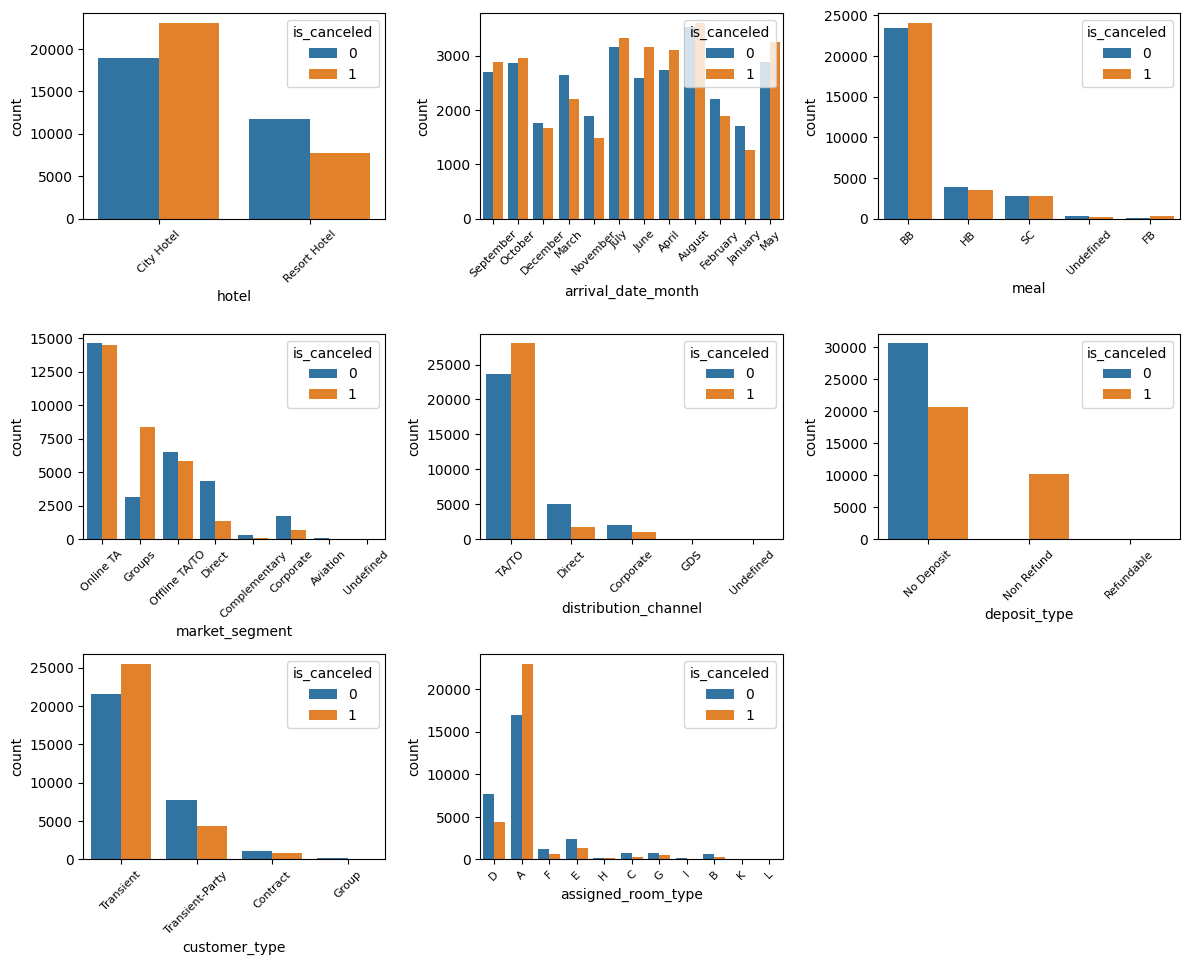

In [ ]:
# Lista de variables cualitativas
categorical_vars = ["hotel", "arrival_date_month", "meal", "market_segment",
                    "distribution_channel", "deposit_type", "customer_type", "assigned_room_type"]

# Tamaño del gráfico
plt.figure(figsize=(12, 12))

# Crear un bucle para generar gráficos de barras apiladas para las variables cualitativas
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=var, hue="is_canceled", data=df_copia)

    #Tamaño y rotación de labels en el "eje x"
    plt.xticks(rotation=45, fontsize=8)

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Ahora visualizamos las variables cuantitativas discretas con respecto a "is_canceled"

<Figure size 600x600 with 0 Axes>

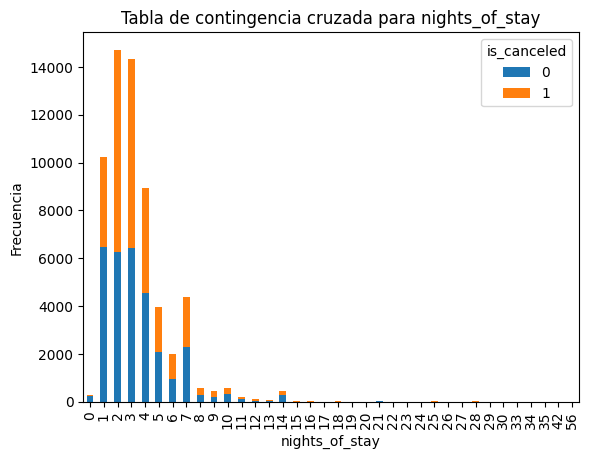

In [ ]:
var = "nights_of_stay"
crosstab_result = pd.crosstab(df_copia[var], df_copia["is_canceled"])
# Crear un gráfico de barras apiladas
plt.figure(figsize=(6, 6))
crosstab_result.plot(kind="bar", stacked=True)
plt.title(f"Tabla de contingencia cruzada para {var}")
plt.xlabel(var)
plt.ylabel("Frecuencia")

plt.show()

Otra variable cuantitativa interesante para relacionar con el target vendria a ser la de adults.

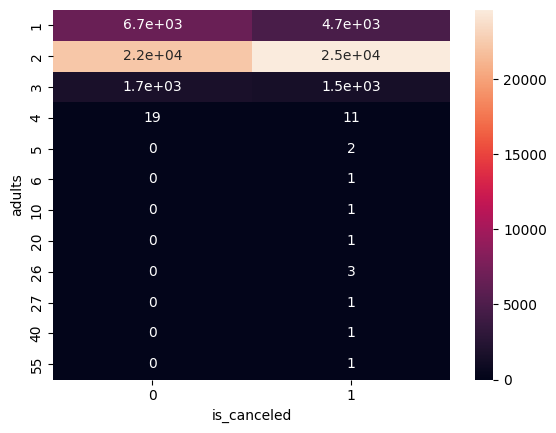

In [ ]:
tabla=pd.crosstab(df_copia['adults'], df_copia['is_canceled'])

grf=sns.heatmap(tabla,annot=True)

Por otro lado, revisamos las variables cuantitativas de tipo continuo

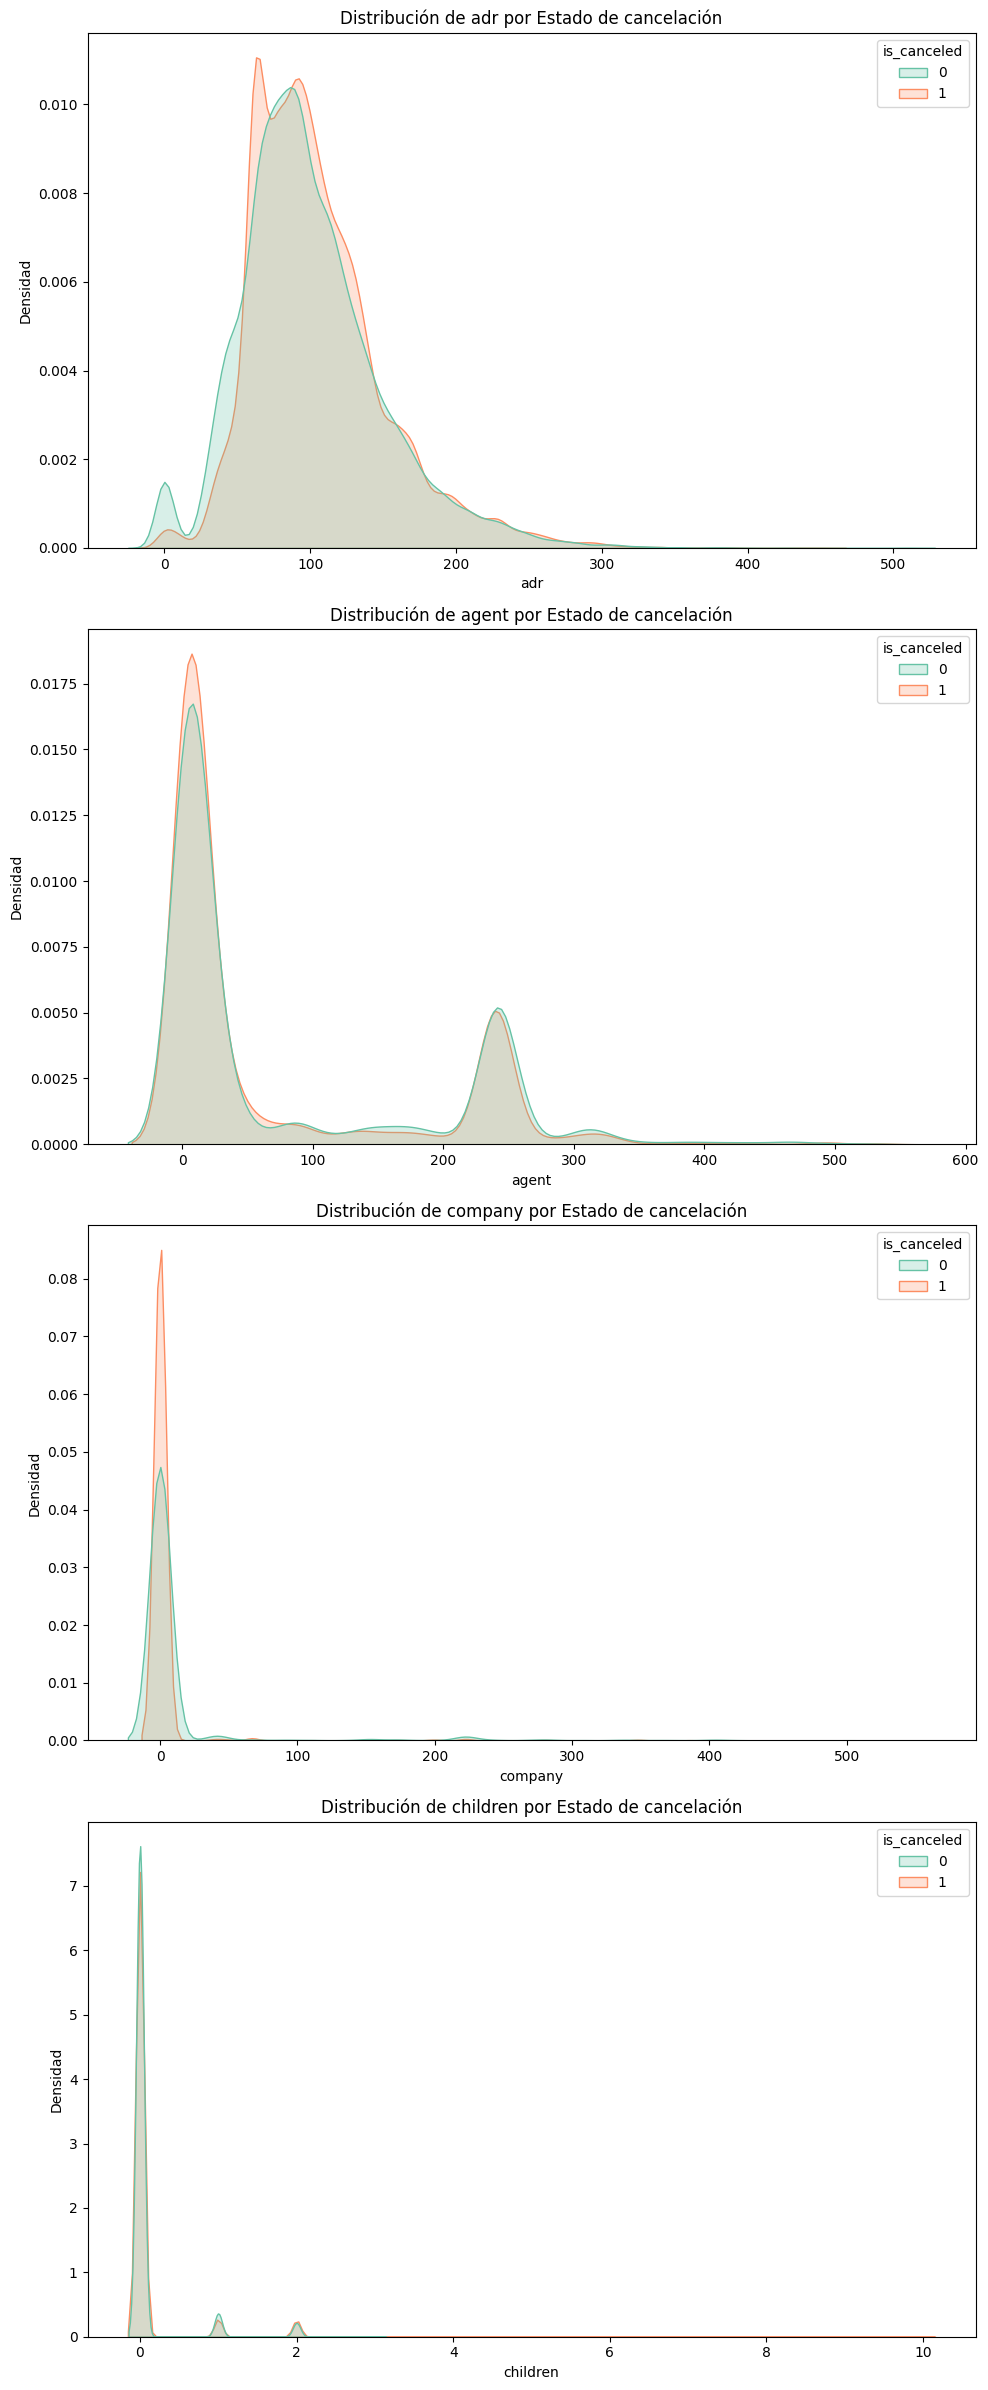

In [ ]:
# Lista de variables continuas
variables_continuas = ["adr", "agent", "company", "children"]

# Configurar el tamaño de la cuadrícula de subgráficos
num_rows = len(variables_continuas)
num_cols = 1  # Un gráfico por fila

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))

# Recorrer las variables continuas y crear gráficos de densidad de kernel
for i, variable in enumerate(variables_continuas):
    # Crear un gráfico de densidad de kernel para la variable actual
    sns.kdeplot(data=df_copia, x=variable, hue="is_canceled", common_norm=False, fill=True, palette="Set2", ax=axes[i])

    # Configurar etiquetas de ejes y título
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Densidad")
    axes[i].set_title(f"Distribución de {variable} por Estado de cancelación")

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Podemos observar mucho mejor la relaciona que tienen las variables con el target a través de su correlacio.


<ipython-input-24-1da9b2392b2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_copia.corr()


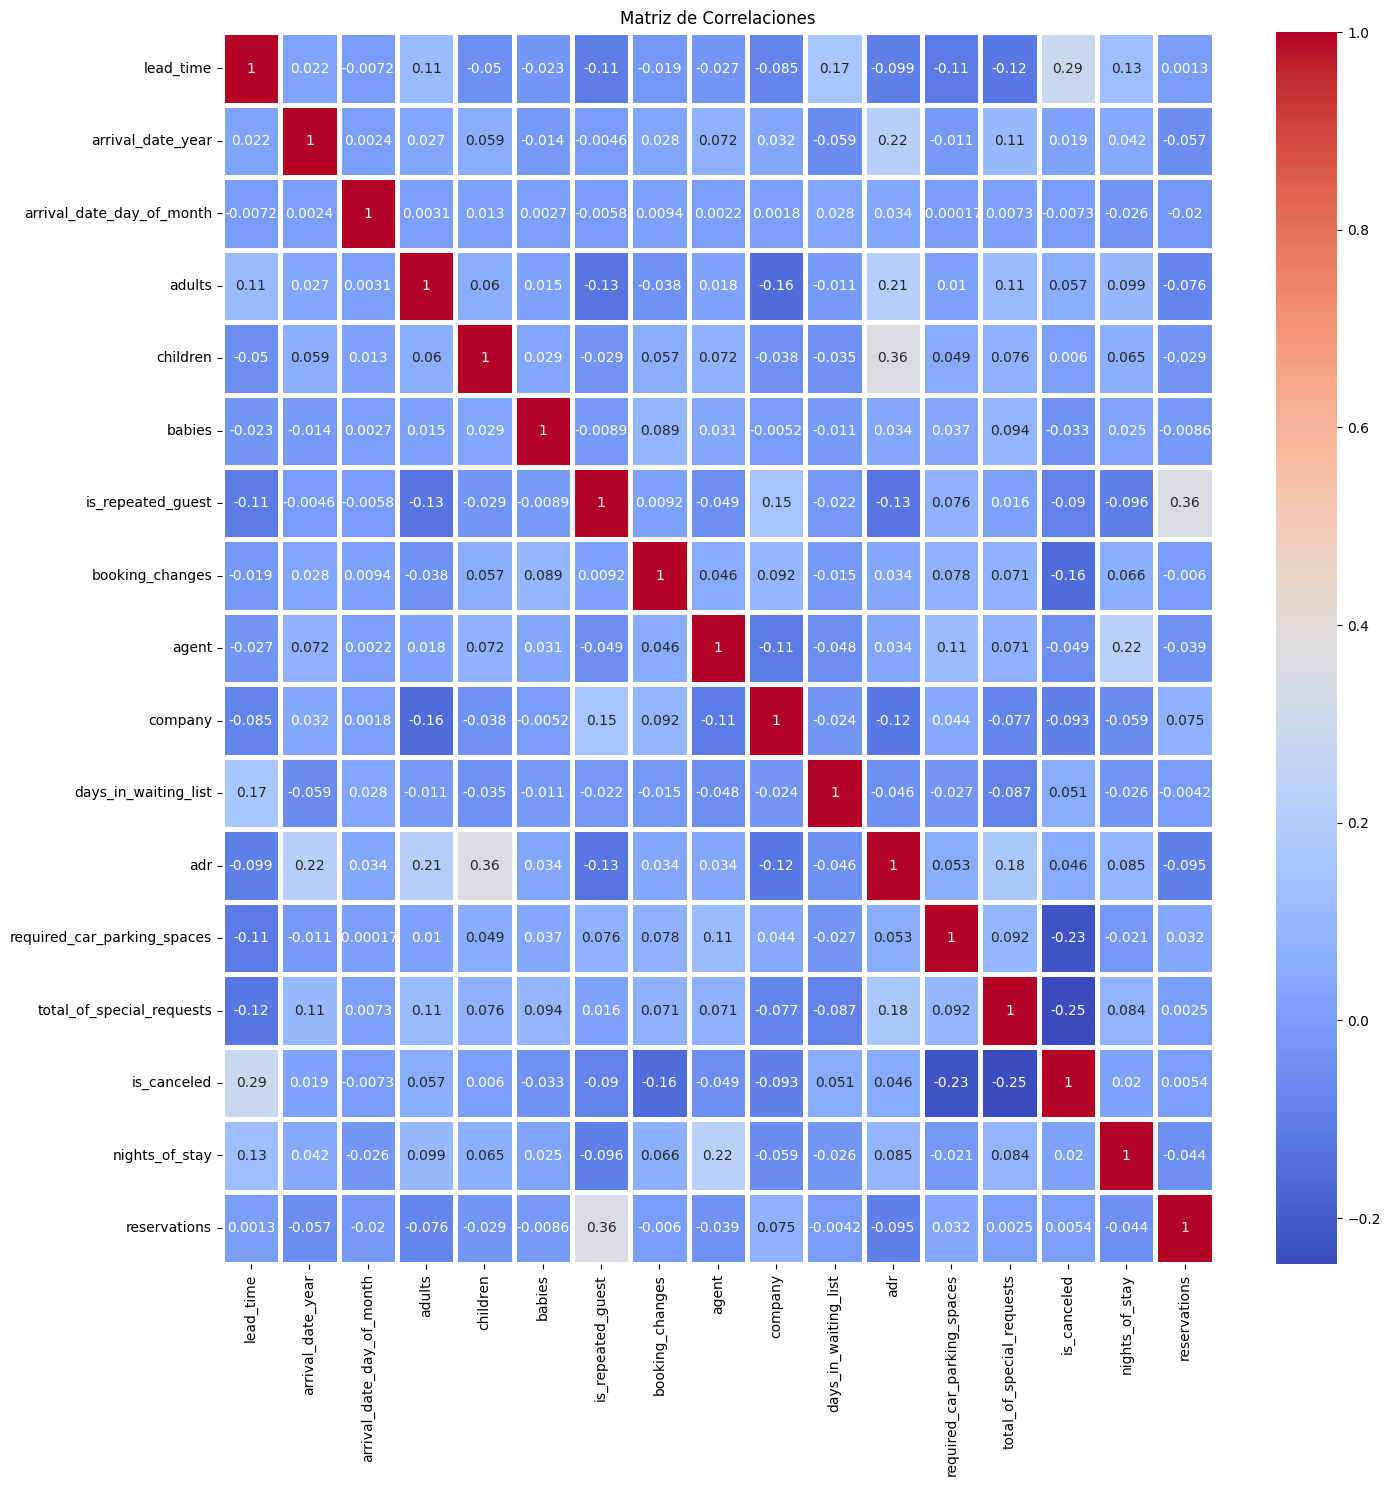

In [ ]:
matriz_correlacion = df_copia.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=2.5)
plt.title("Matriz de Correlaciones")
#Valores cercanos a 1 indican una correlación positiva fuerte.
#Valores cercanos a -1 indican una correlación negativa fuerte.
#Valores cercanos a 0 indican una correlación débil o nula.
plt.show()

## **Medidas de resumen**

Seleccionamos las variables cuantitativas y realizamos el calculo de sus medidas


In [ ]:
variables_cuantitativas = df_copia[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'nights_of_stay', 'adults', 'children', 'babies',
                          'is_repeated_guest', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',
                          'is_canceled', 'agent', 'company', 'reservations']]

**Media**

Es el valor promedio del grupo datos, es decir, la cifra que se obtiene al sumar todos los datos y dividir el resultado entre la cantidad de los mismos.

In [ ]:
variables_cuantitativas.mean()

lead_time                       112.537285
arrival_date_year              2016.155610
arrival_date_day_of_month        15.786748
nights_of_stay                    3.436488
adults                            1.870195
children                          0.101577
babies                            0.007187
is_repeated_guest                 0.027772
booking_changes                   0.194358
days_in_waiting_list              2.652634
adr                             102.673147
required_car_parking_spaces       0.049577
total_of_special_requests         0.522992
is_canceled                       0.501171
agent                            73.987821
company                           9.453919
reservations                      0.226862
dtype: float64

**Mediana**

La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor.

In [ ]:
variables_cuantitativas.median()

lead_time                        78.0
arrival_date_year              2016.0
arrival_date_day_of_month        16.0
nights_of_stay                    3.0
adults                            2.0
children                          0.0
babies                            0.0
is_repeated_guest                 0.0
booking_changes                   0.0
days_in_waiting_list              0.0
adr                              95.0
required_car_parking_spaces       0.0
total_of_special_requests         0.0
is_canceled                       1.0
agent                             9.0
company                           0.0
reservations                      0.0
dtype: float64

**Moda**

La moda es el valor que aparece con mayor frecuencia en un conjunto de datos.


In [ ]:
variables_cuantitativas.mode()

,lead_time,arrival_date_year,arrival_date_day_of_month,nights_of_stay,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,agent,company,reservations
0,0,2016,17,2,2,0,0,0,0,0,62.0,0,0,1,9.0,0.0,0


**Varianza**

La varianza es una medida de dispersión que representa la variabilidad de una serie de datos con respecto a su media.

In [ ]:
variables_cuantitativas.var()

lead_time                      12269.486130
arrival_date_year                  0.502070
arrival_date_day_of_month         77.349684
nights_of_stay                     6.355923
adults                             0.336571
children                           0.155945
babies                             0.008534
is_repeated_guest                  0.027001
booking_changes                    0.366605
days_in_waiting_list             348.488564
adr                             2269.306971
required_car_parking_spaces        0.048518
total_of_special_requests          0.600115
is_canceled                        0.250003
agent                          11280.739002
company                         2542.827370
reservations                       3.295286
dtype: float64

**Covarianza**

La covarianza es una medida de *asociación lineal* entre dos variables, nos indica el sentido/direccion de esa asociacion lineal.

-Covarianza positiva: hay una asociacion lineal con pendiente positiva.

-Covarianza negativa: hay una asociacion lineal con pendiente negativa.

-Covarianza cercana a 0: no hay asociacion linal entre las variables.

In [ ]:
matriz_cov= variables_cuantitativas.cov()
matriz_cov

,lead_time,arrival_date_year,arrival_date_day_of_month,nights_of_stay,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,agent,company,reservations
lead_time,12269.486130,1.762032,-7.016561,35.272543,7.035954,-2.180449,-0.235556,-1.952596,-1.251779,344.410576,-524.158380,-2.755658,-10.647412,16.184049,-313.987310,-473.195675,0.269790
arrival_date_year,1.762032,0.502070,0.015005,0.074600,0.011272,0.016519,-0.000891,-0.000533,0.011935,-0.774756,7.367818,-0.001715,0.059155,0.006810,5.393739,1.145141,-0.073059
arrival_date_day_of_month,-7.016561,0.015005,77.349684,-0.580830,0.015571,0.043987,0.002199,-0.008322,0.050098,4.516306,14.112670,-0.000322,0.049676,-0.032296,2.033322,0.785121,-0.315545
nights_of_stay,35.272543,0.074600,-0.580830,6.355923,0.144839,0.064753,0.005725,-0.039716,0.101199,-1.231115,10.225217,-0.011851,0.163349,0.025506,59.623863,-7.464040,-0.202327
adults,7.035954,0.011272,0.015571,0.144839,0.336571,0.013641,0.000787,-0.012086,-0.013503,-0.116084,5.898169,0.001313,0.050327,0.016486,1.092746,-4.575170,-0.080472
children,-2.180449,0.016519,0.043987,0.064753,0.013641,0.155945,0.001075,-0.001894,0.013738,-0.258671,6.841970,0.004265,0.023348,0.001190,3.035595,-0.759014,-0.020947
babies,-0.235556,-0.000891,0.002199,0.005725,0.000787,0.001075,0.008534,-0.000135,0.004993,-0.018821,0.147747,0.000749,0.006713,-0.001504,0.305393,-0.023994,-0.001435
is_repeated_guest,-1.952596,-0.000533,-0.008322,-0.039716,-0.012086,-0.001894,-0.000135,0.027001,0.000911,-0.066793,-1.015415,0.002737,0.002028,-0.007366,-0.850196,1.268959,0.106693
booking_changes,-1.251779,0.011935,0.050098,0.101199,-0.013503,0.013738,0.004993,0.000911,0.366605,-0.167937,0.975314,0.010364,0.033134,-0.048106,2.940382,2.807319,-0.006629
days_in_waiting_list,344.410576,-0.774756,4.516306,-1.231115,-0.116084,-0.258671,-0.018821,-0.066793,-0.167937,348.488564,-41.052650,-0.109512,-1.258904,0.474618,-94.949579,-22.556317,-0.141849


## **Grafico de distribuciones**

Depende del tipo de la variables, hay graficos especificos para poder entender mejor como se distribuyen.
Estos graficos nos sirven para ver si hay variables que toman el mismo valor siempre.

En base a esto, nos permitira descartar ya algunas variables que no nos aporten mucho en el analisis, ya que sea si lo cancelo o no, la variable no cambia.

### **Variables cuantitativas**

Empezemos con las variables cuantitativas.

In [ ]:
variables_cualitativas = df_copia.select_dtypes(include=['object'])
variables_cualitativas.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'id'],
      dtype='object')

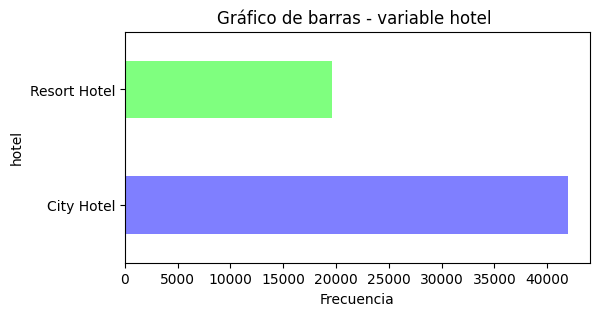

In [ ]:
#hotel

colores=[(0,0,1),(0,1,0)]
plt.figure(figsize=(6, 3))
grf = variables_cualitativas['hotel'].value_counts().plot.barh(alpha=0.5, color = colores, title="Gráfico de barras - variable hotel " , xlabel="Frecuencia" , ylabel="hotel")
#grf.set_size_inches(8, 4)

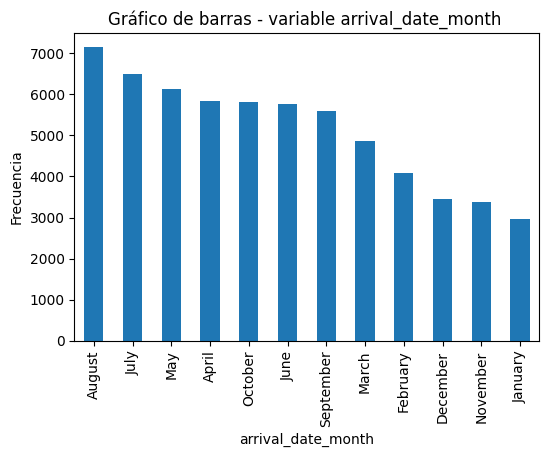

In [ ]:
#arrival_date_month

plt.figure(figsize=(6, 4))
grf = variables_cualitativas['arrival_date_month'].value_counts().plot.bar(title="Gráfico de barras - variable arrival_date_month " , xlabel="arrival_date_month" , ylabel="Frecuencia")

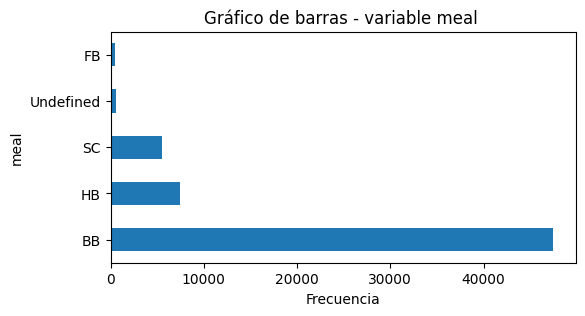

In [ ]:
#meal

plt.figure(figsize=(6, 3))
grf = variables_cualitativas['meal'].value_counts().plot.barh(title="Gráfico de barras - variable meal " , xlabel="Frecuencia" , ylabel="meal")

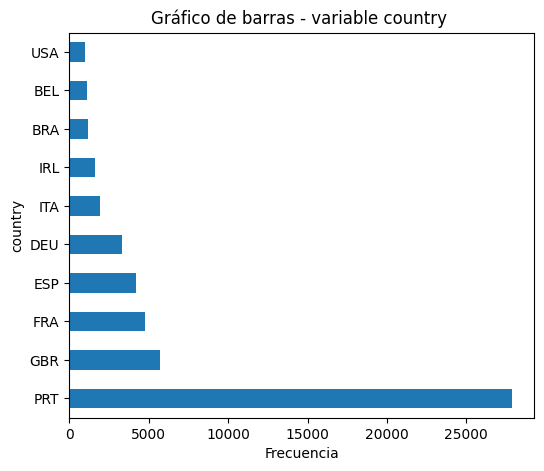

In [ ]:
#country
#En esta variable, los posibles valores que tomas son muchos, por ende, se elijieron
#los primero 10 paises mas frecuentes.

plt.figure(figsize=(6, 5))
grf = variables_cualitativas['country'].value_counts().head(10).plot.barh(title="Gráfico de barras - variable country " , xlabel="Frecuencia" , ylabel="country")

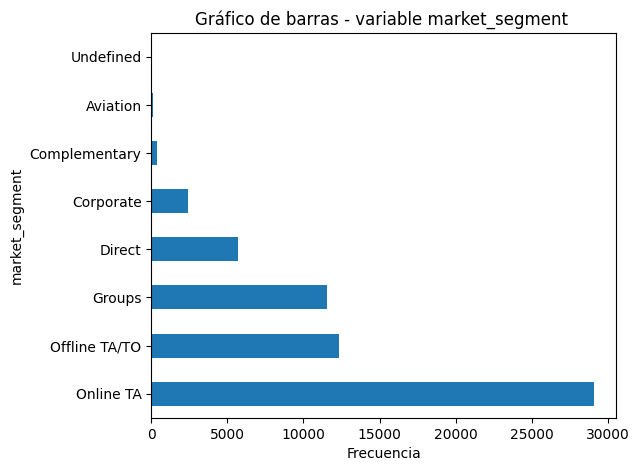

In [ ]:
#market_segment

plt.figure(figsize=(6, 5))
grf = variables_cualitativas['market_segment'].value_counts().plot.barh(title="Gráfico de barras - variable market_segment " , xlabel="Frecuencia" , ylabel="market_segment")

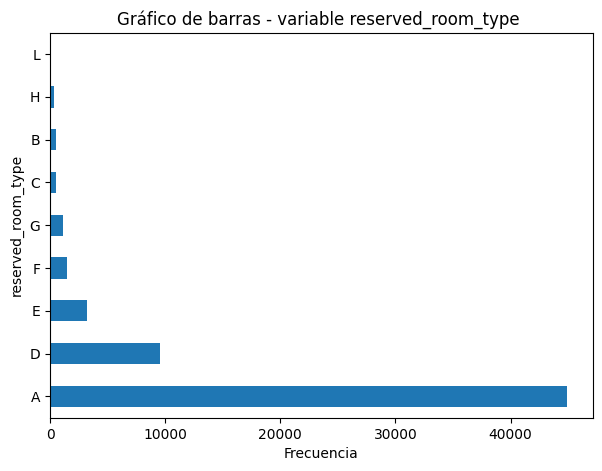

In [ ]:
#reserved_room_type

plt.figure(figsize=(7, 5))
grf = variables_cualitativas['reserved_room_type'].value_counts().plot.barh(title="Gráfico de barras - variable reserved_room_type " , ylabel="reserved_room_type" , xlabel="Frecuencia")

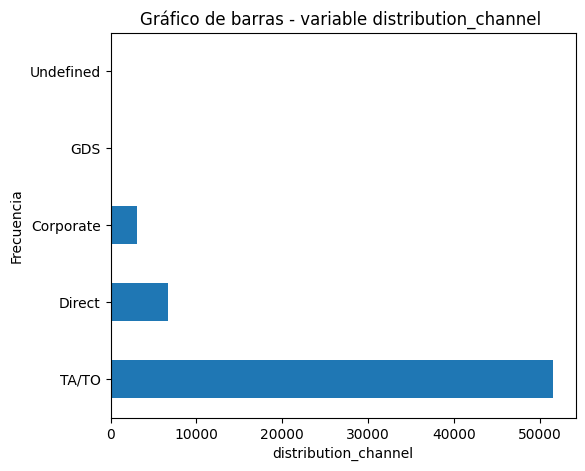

In [ ]:
#distribution_channel

plt.figure(figsize=(6, 5))
grf = variables_cualitativas['distribution_channel'].value_counts().plot.barh(title="Gráfico de barras - variable distribution_channel " , xlabel="distribution_channel" , ylabel="Frecuencia")

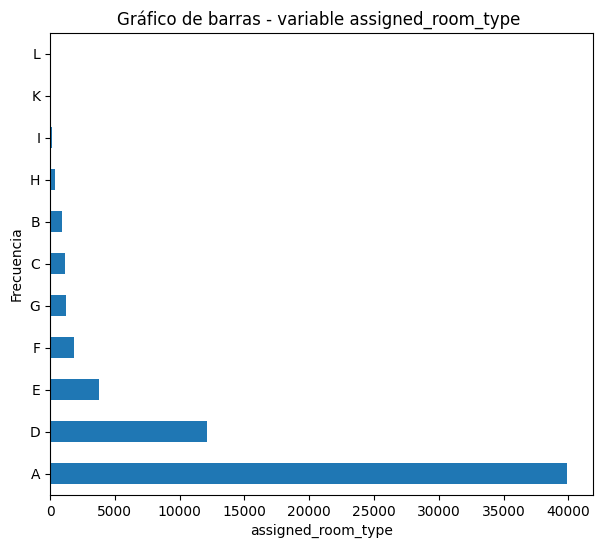

In [ ]:
#assigned_room_type

plt.figure(figsize=(7, 6))
grf = variables_cualitativas['assigned_room_type'].value_counts().plot.barh(title="Gráfico de barras - variable assigned_room_type " , xlabel="assigned_room_type" , ylabel="Frecuencia")

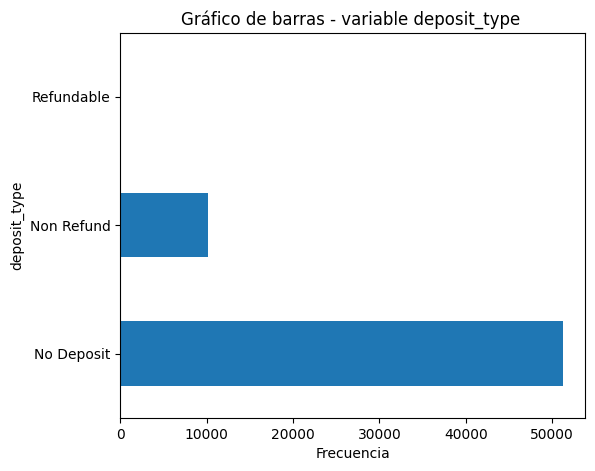

In [ ]:
#deposit_type

plt.figure(figsize=(6, 5))
grf = variables_cualitativas['deposit_type'].value_counts().plot.barh(title="Gráfico de barras - variable deposit_type " , ylabel="deposit_type" , xlabel="Frecuencia")

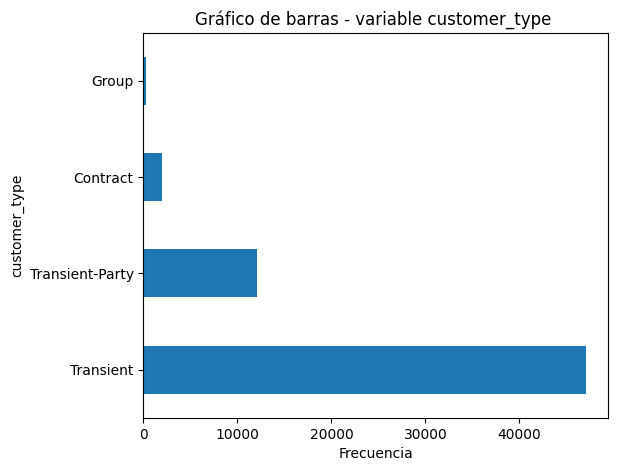

In [ ]:
#customer_type

plt.figure(figsize=(6, 5))
grf = variables_cualitativas['customer_type'].value_counts().plot.barh(title="Gráfico de barras - variable customer_type " , ylabel="customer_type" , xlabel="Frecuencia")

### **Variables cuantitativas**

Sigamos con las variables cualitativas.

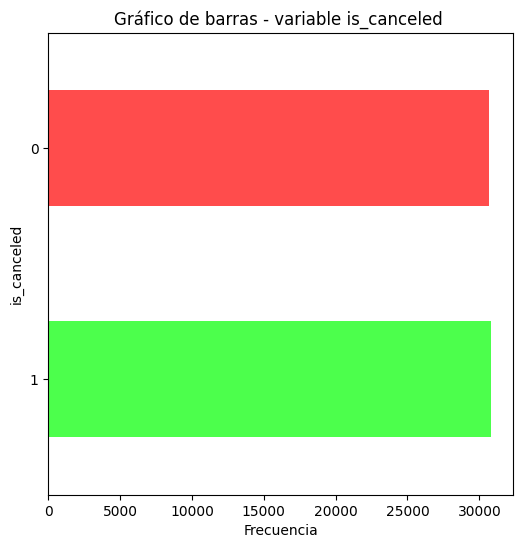

In [ ]:
#is_canceled

colores=[(0, 1, 0),(1, 0, 0)]
plt.figure(figsize=(6, 6))
grf_ds=variables_cuantitativas['is_canceled'].value_counts().plot.barh(alpha=0.7 , title="Gráfico de barras - variable is_canceled " , ylabel="is_canceled" , xlabel="Frecuencia", color = colores)

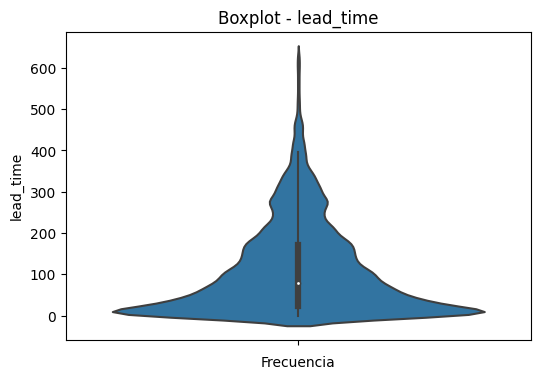

In [ ]:
#lead_time

plt.figure(figsize=(6, 4))
grf=sns.violinplot(y="lead_time", data=variables_cuantitativas).set(title="Boxplot - lead_time",xlabel="Frecuencia",ylabel="lead_time")

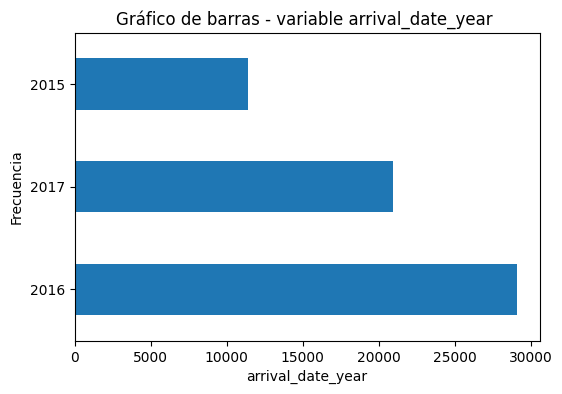

In [ ]:
#arrival_date_year

plt.figure(figsize=(6, 4))
grf = variables_cuantitativas['arrival_date_year'].value_counts().plot.barh(title="Gráfico de barras - variable arrival_date_year " , xlabel="arrival_date_year" , ylabel="Frecuencia")

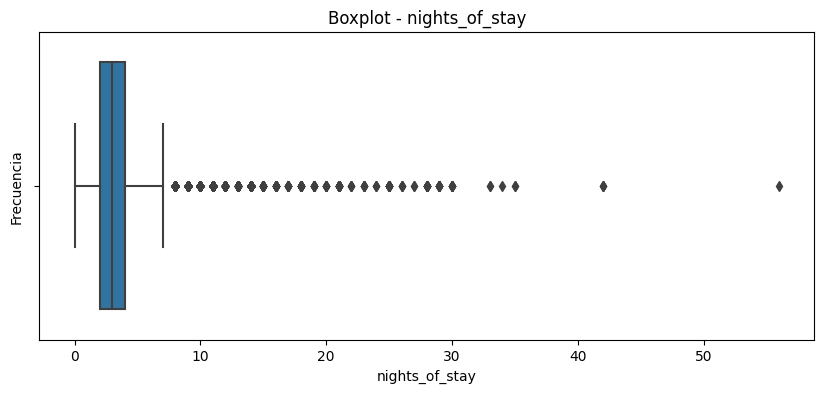

In [ ]:
#nights_of_stay
plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="nights_of_stay", data=variables_cuantitativas).set(title="Boxplot - nights_of_stay",ylabel="Frecuencia",xlabel="nights_of_stay")

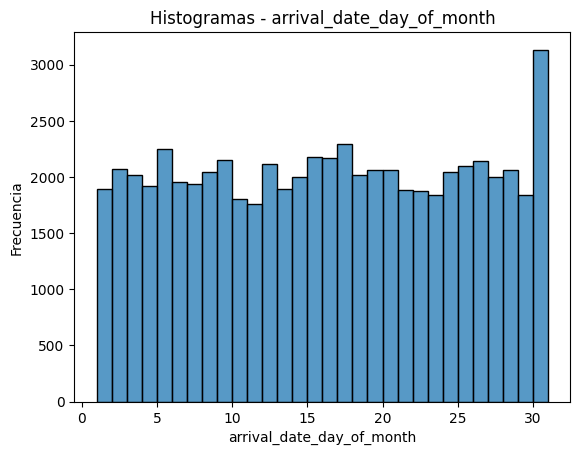

In [ ]:
#arrival_date_day_of_month

sns_hist=sns.histplot(data=variables_cuantitativas['arrival_date_day_of_month'], bins = 30).set(title="Histogramas - arrival_date_day_of_month",xlabel="arrival_date_day_of_month",ylabel="Frecuencia")

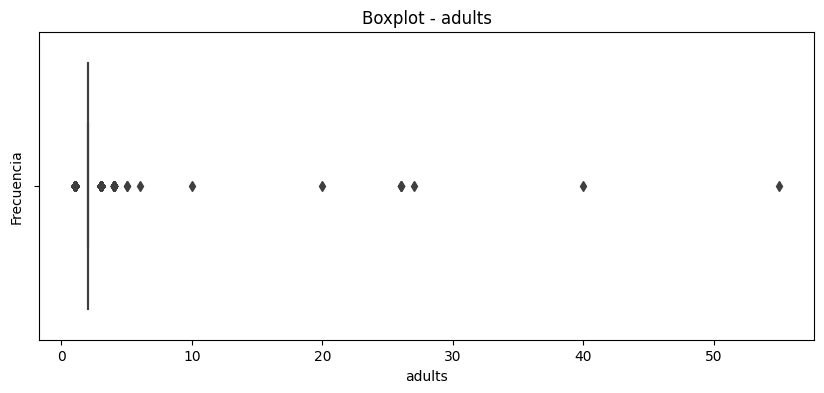

In [ ]:
#adults
plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="adults", data=variables_cuantitativas).set(title="Boxplot - adults",ylabel="Frecuencia",xlabel="adults")

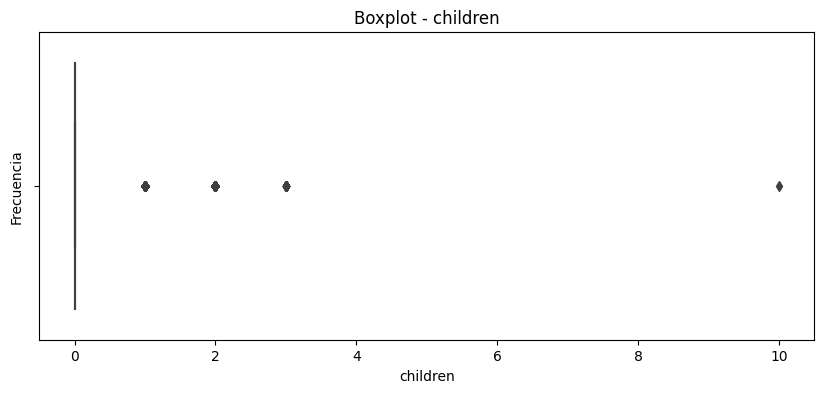

In [ ]:
#children
plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="children", data=variables_cuantitativas).set(title="Boxplot - children",ylabel="Frecuencia",xlabel="children")

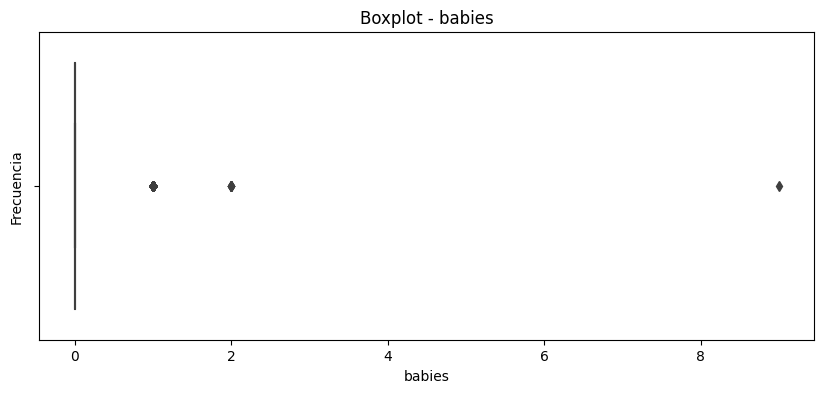

In [ ]:
#babies

plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="babies", data=variables_cuantitativas).set(title="Boxplot - babies",ylabel="Frecuencia",xlabel="babies")

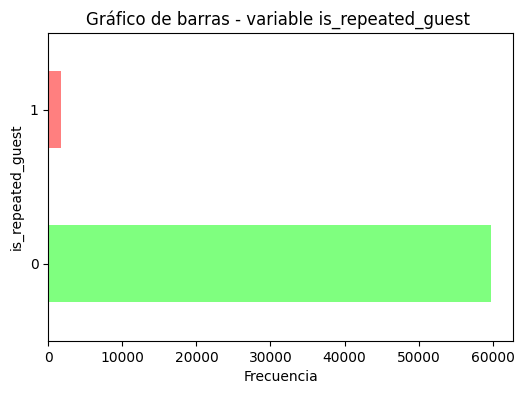

In [ ]:
#is_repeated_guest

plt.figure(figsize=(6, 4))
grf = variables_cuantitativas['is_repeated_guest'].value_counts().plot.barh(alpha=0.5, color = colores, title="Gráfico de barras - variable is_repeated_guest " , ylabel="is_repeated_guest" , xlabel="Frecuencia")

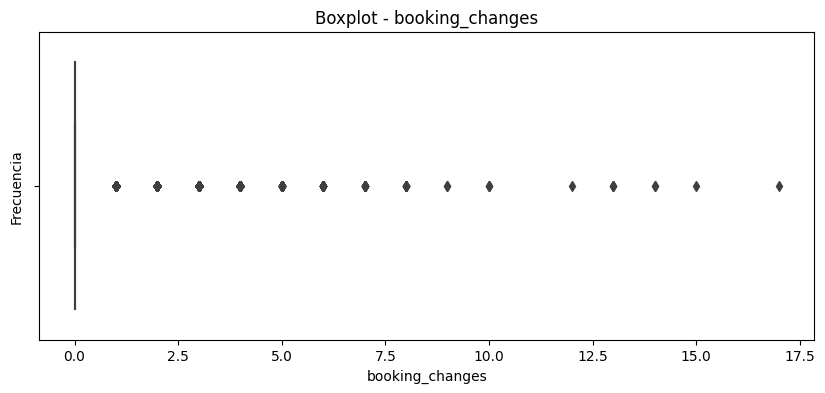

In [ ]:
#booking_changes

plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="booking_changes", data=variables_cuantitativas).set(title="Boxplot - booking_changes",ylabel="Frecuencia",xlabel="booking_changes")

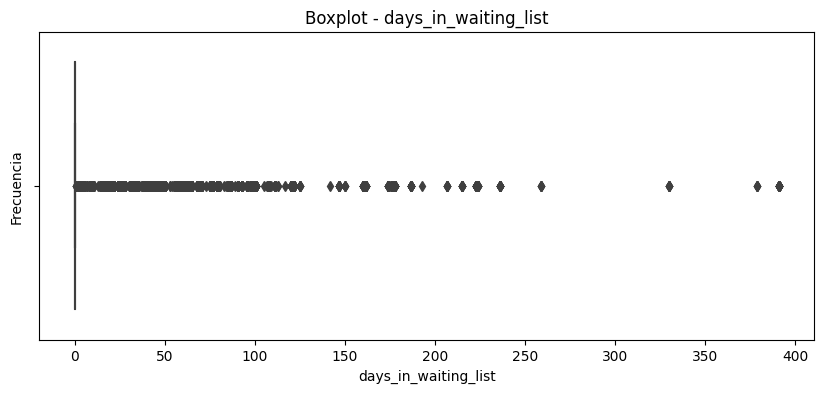

In [ ]:
#days_in_waiting_list
plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="days_in_waiting_list", data=variables_cuantitativas).set(title="Boxplot - days_in_waiting_list",ylabel="Frecuencia",xlabel="days_in_waiting_list")

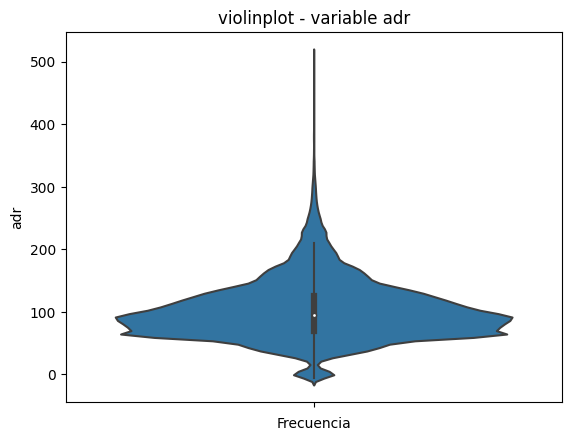

In [ ]:
#adr

grf=sns.violinplot(y="adr", data=variables_cuantitativas).set(title="violinplot - variable adr",xlabel="Frecuencia",ylabel="adr")

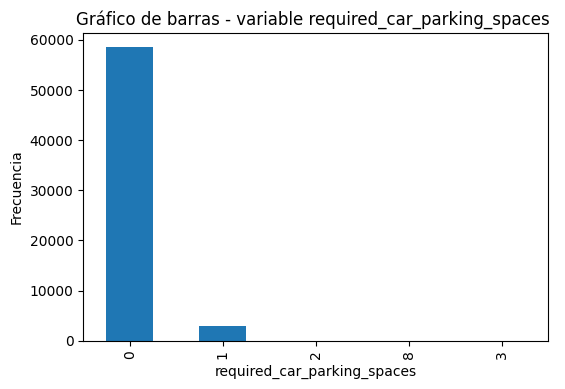

In [ ]:
#required_car_parking_spaces

plt.figure(figsize=(6, 4))
grf = variables_cuantitativas['required_car_parking_spaces'].value_counts().plot.bar(title="Gráfico de barras - variable required_car_parking_spaces " , xlabel="required_car_parking_spaces" , ylabel="Frecuencia")

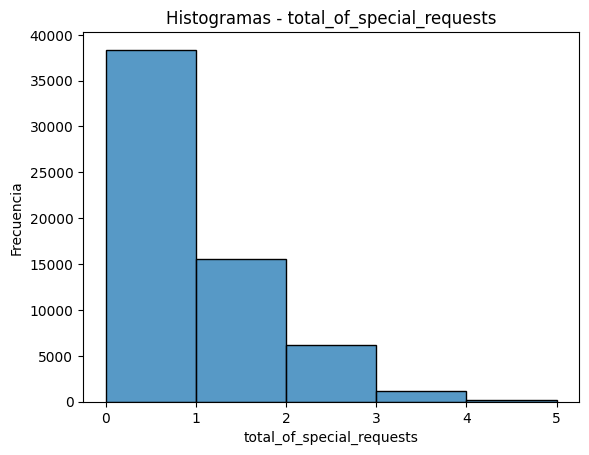

In [ ]:
#total_of_special_requests

sns_hist=sns.histplot(data=variables_cuantitativas['total_of_special_requests'], bins = 5).set(title="Histogramas - total_of_special_requests",xlabel="total_of_special_requests",ylabel="Frecuencia")

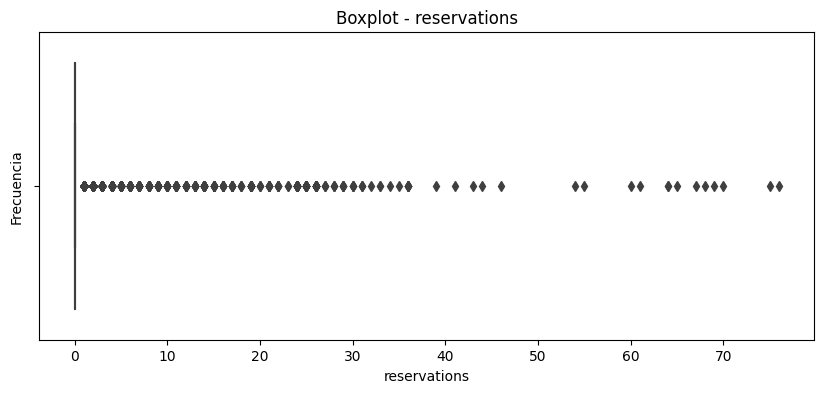

In [ ]:
#reservations

plt.figure(figsize=(10, 4))
grf=sns.boxplot(x="reservations", data=variables_cuantitativas).set(title="Boxplot - reservations",ylabel="Frecuencia",xlabel="reservations")

## **Valores atípicos**

Realizaremos un analisis sobre los posibles valores atipicos que pueden existir en nuestras variables.


### **Valores atípicos univariado**

Para detectarlos, utilizaremos el metodo **Z-Score Modificado**, ya que en nuestras variables, es muy posible que la media y la desviacion estandar esten muy afectadas por los valores extremos que pueden tomar en los datos.

¿Que variables vale la pena analizar?

Tendremos en cuenta solo algunas variables que no sean categoricas, osea, cuantitativas, ya que los valores posibles que pueden tomar las categoricas estan explicadas en el papers que viene del dataset, aparte de que en los graficos de distribucion vemos que respetan las posibles categorias que puedan tomar.

Eso si, capaz haya algunas variables cuantitativas que tampoco valga la pena analizar, ya que los valores que toman son conocidos con anteoridad.

* is_canceled: toma valores como 1 y 0.
* agent y company: DNI de agencias y compañias que realizaron las reservas.
* arrival_date_year: en la distribucion vemos que solo toma valores como 2015, 2016, 2017
* is_repeated_guest= igual que is_canceled, toma valores como 1 y 0

Entonces, empezemos seleccionando las columnas a las que aplicaremos el metodo.

In [ ]:
columnas_a_no_tener_encuenta = ['adults', 'children', 'babies', 'booking_changes',
                              'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'reservations',
                              'is_canceled', 'company', 'agent', 'arrival_date_year',
                              'is_repeated_guest']
v_c_copy = variables_cuantitativas.drop(columnas_a_no_tener_encuenta, axis=1)
v_c_copy.columns


Index(['lead_time', 'arrival_date_day_of_month', 'nights_of_stay', 'adr'], dtype='object')

Calculamos los z-score modificado.

In [ ]:
i = 0
for columna in v_c_copy.columns:
  if i < 4:
    mediana_columna = np.median(v_c_copy[columna])
    MAD=np.median(np.absolute(v_c_copy[columna]-mediana_columna))
    nueva_columna = 'zm_' + columna
    v_c_copy[nueva_columna]=(v_c_copy[columna] - mediana_columna)*0.6745/MAD
  i = i + 1

v_c_copy.head()

,lead_time,arrival_date_day_of_month,nights_of_stay,adr,zm_lead_time,zm_arrival_date_day_of_month,zm_nights_of_stay,zm_adr
0,49,5,3,115.5,-0.300931,-0.927438,0.000,0.502809
1,4,31,1,42.0,-0.767892,1.264687,-1.349,-1.299945
2,25,13,1,229.0,-0.549977,-0.252937,-1.349,3.286655
3,26,12,7,75.0,-0.539600,-0.337250,2.698,-0.490545
4,104,19,7,75.0,0.269800,0.252937,2.698,-0.490545


Vemos si existe valores "atipicos" mediante la regla de oro: si su z-score modificado es inferior a -3,5 o mayor a 3,5.

Empezemos con la variable **lead_time**.

In [ ]:
df_zm_lead_time = v_c_copy[((v_c_copy['zm_lead_time'] < -3.5) | (v_c_copy['zm_lead_time'] > 3.5))]
df_zm_lead_time.shape

(1078, 8)

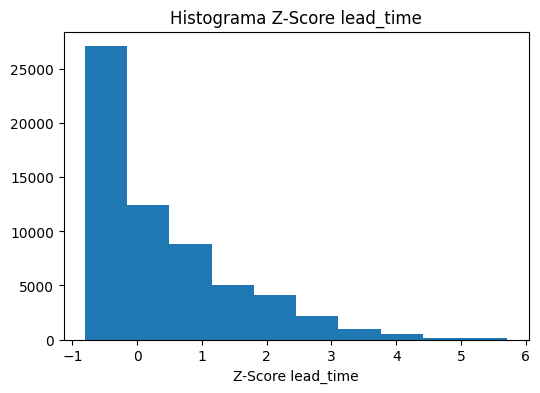

Valor maximo de stays_in_weekend_nights: 629
Valor minimo de stays_in_weekend_nights: 418


In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(v_c_copy.zm_lead_time)
plt.title('Histograma Z-Score lead_time')
plt.xlabel('Z-Score lead_time')
plt.show()

min_zm_lead_time = df_zm_lead_time['lead_time'].min()
max_zm_lead_time = df_zm_lead_time['lead_time'].max()
print("Valor maximo de stays_in_weekend_nights: " + str(max_zm_lead_time))
print("Valor minimo de stays_in_weekend_nights: " + str(min_zm_lead_time))

<Axes: ylabel='lead_time'>

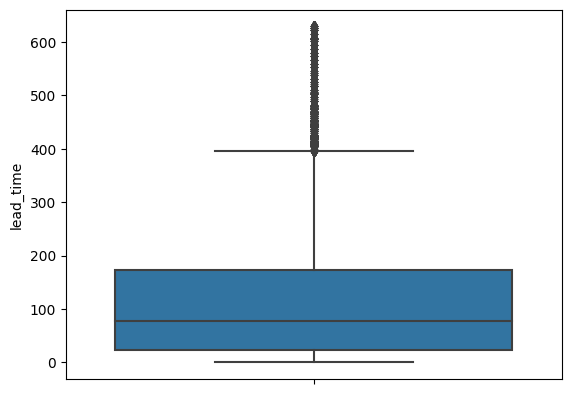

In [ ]:
sns.boxplot(y=df_copia.lead_time)

Vemos que hay un porcentaje de registros que conllevan valores atipicos en la variable **lead_time**.
¿Es normal que se aleje tanto de los valores "normales"?

Segun el papers, sus valores nos dice los de días que transcurrieron entre la fecha de entrada de la reserva en el PMS (base de datos) y la fecha de llegada.

Suponemos que es normal que transcurran varios dias la entrada de varios registros a la base de datos, ya que algunos pueden ser muy viejos y ser cargados despues de un tiempo, a comparacion de los registros mas nuevos.

Comparemos los años de estos registros con estos valores outliers.



In [ ]:
(df_copia[df_copia['lead_time'] >= min_zm_lead_time])['arrival_date_year'].value_counts()

2016    595
2017    483
Name: arrival_date_year, dtype: int64

Al final pasa lo contrario, estos registros son los mas "nuevos", ya que el año mas viejo es de 2015.

¿Sera porque estas reservas fueron canceladas?

In [ ]:
(df_copia[df_copia['lead_time'] >= min_zm_lead_time])['is_canceled'].value_counts()

1    907
0    171
Name: is_canceled, dtype: int64

Vemos que la mayoria de las reservas fueron canceladas, a comparacion de las que no fueron.

Mientras mas dias pase entre la entrada del registro a la base de datos y la fecha de llegada, hay mas probabilidad de que la reserva sea cancelada.

Seguimos con la variable **arrival_date_day_of_month**.

In [ ]:
df_zm_arrival_date_day_of_month = v_c_copy[((v_c_copy['zm_arrival_date_day_of_month'] < -3.5) | (v_c_copy['zm_arrival_date_day_of_month'] > 3.5))]

df_zm_arrival_date_day_of_month.shape

(0, 8)

Vemos que esta variable no presenta valores atipicos.

Seguimos con la variable **adr**.

In [ ]:
df_zm_adr = v_c_copy[((v_c_copy['zm_adr'] < -3.5) | (v_c_copy['zm_adr'] > 3.5))]

df_zm_adr.shape

(967, 8)

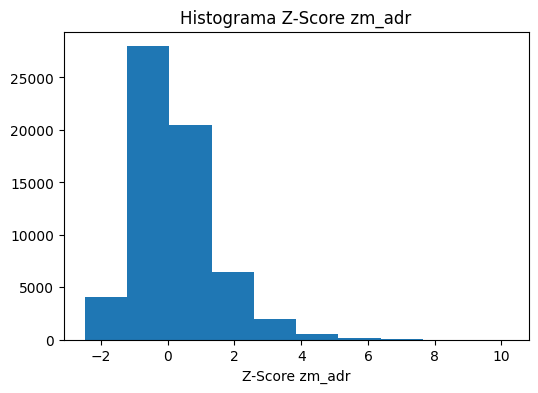

Valor maximo de adr: 510.0
Valor minimo de adr: 237.75


In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(v_c_copy.zm_adr)
plt.title('Histograma Z-Score zm_adr')
plt.xlabel('Z-Score zm_adr')
plt.show()

min_zm_adr = df_zm_adr['adr'].min()
max_zm_adr = df_zm_adr['adr'].max()
print("Valor maximo de adr: " + str(max_zm_adr))
print("Valor minimo de adr: " + str(min_zm_adr))

<Axes: ylabel='adr'>

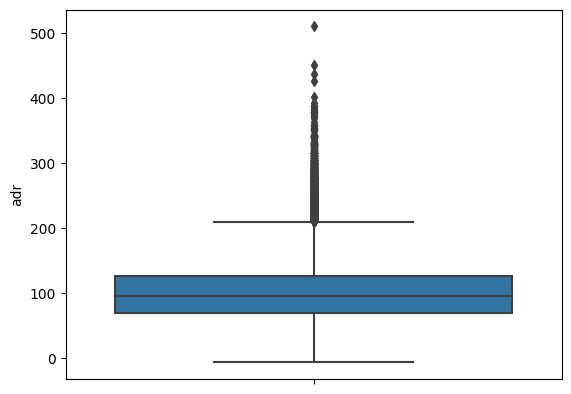

In [ ]:
sns.boxplot(y=df.adr)

Detectamos varios valores atipicos en la variable **adr**.
Esta variable nos dice la tarifa diaria promedio del hotel, basicamente el costo en si.

Esta variable puede variar dependiendo de multiples factores, ya sea el tipo de hotel, la cantidad de habitaciones, la estancia, etc.

Primero vayamos a lo mas importante, ¿tiene relacion con que si fue cancelada o no la reserva?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['is_canceled'].value_counts()

1    505
0    462
Name: is_canceled, dtype: int64

Podemos decir que, una tarifa alta no siempre implica que la reserva sea cancelada o no, es indistinto.

¿Tendra que ver con el tipo de comida reservada?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['meal'].value_counts()

BB           552
HB           370
FB            31
Undefined     14
Name: meal, dtype: int64

¿Con las solicitudes especiales realizadas?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['total_of_special_requests'].value_counts()

0    464
1    299
2    147
3     43
4     12
5      2
Name: total_of_special_requests, dtype: int64

¿Las plazas de aparcamiento solicitadas?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['required_car_parking_spaces'].value_counts()

0    844
1    121
2      2
Name: required_car_parking_spaces, dtype: int64

¿Cantidad de habitaciones?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['adults'].value_counts()

2    723
3    192
1     40
4     12
Name: adults, dtype: int64

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['children'].value_counts()

0    419
2    346
1    187
3     15
Name: children, dtype: int64

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['babies'].value_counts()

0    945
1     21
2      1
Name: babies, dtype: int64

¿Por el tipo de hotel?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['hotel'].value_counts()

Resort Hotel    711
City Hotel      256
Name: hotel, dtype: int64

¿Por la cantidad de noches?

In [ ]:
(df_copia[df_copia['adr'] >= min_zm_adr])['nights_of_stay'].value_counts()

4     148
3     147
2     141
5     134
7     129
1     112
6      83
10     24
8      19
9      13
14      8
11      5
12      2
13      2
Name: nights_of_stay, dtype: int64

Vemos que hay muchas variacion entre los factores que puede depender de esta variable.

Seguramente estos registros con valores de adr altos sean casos excepcionales, ya que se le puede agregar varias cosas a la reserva para que esta valga tanto. Decidiremos dejarlas en el dataset.

Analicemos ahora la variable **nights_of_stay**.

In [ ]:
df_zm_nights_of_stay = v_c_copy[((v_c_copy['zm_nights_of_stay'] < -3.5) | (v_c_copy['zm_nights_of_stay'] > 3.5))]

df_zm_nights_of_stay.shape

(2089, 8)

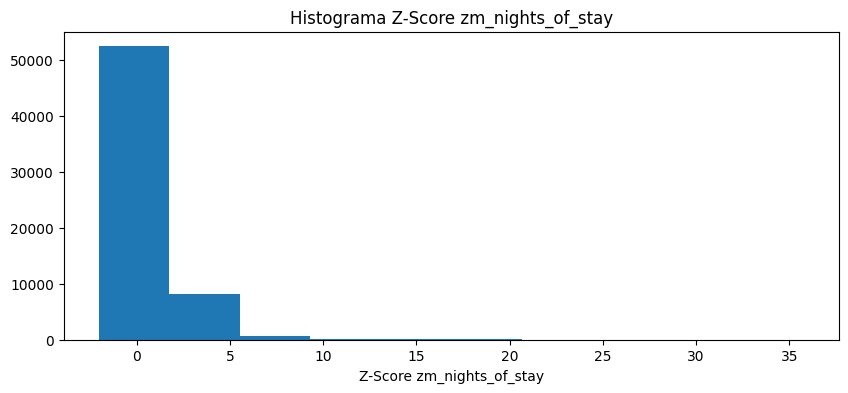

Valor maximo de nights_of_stay: 56
Valor minimo de nights_of_stay: 9


In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(v_c_copy.zm_nights_of_stay)
plt.title('Histograma Z-Score zm_nights_of_stay')
plt.xlabel('Z-Score zm_nights_of_stay')
plt.show()

min_zm_nights_of_stay = df_zm_nights_of_stay['nights_of_stay'].min()
max_zm_nights_of_stay = df_zm_nights_of_stay['nights_of_stay'].max()
print("Valor maximo de nights_of_stay: " + str(max_zm_nights_of_stay))
print("Valor minimo de nights_of_stay: " + str(min_zm_nights_of_stay))

Vemos que hay algunos registros que tienen valores atipicos en la variable **nights_of_stay**.

Esta variable nos dice la cantidad de noches que se quedaron en el hotel.

¿Tiene sentido que la reserva tenga tantas noches en el hotel?

Capaz puede ser que, dependiendo del tipo de hotel que se hospeden, se pueden quedar mas noches, a comparacion de otros hoteles.

Comparemos.

In [ ]:
(df_copia[df_copia['nights_of_stay'] >= min_zm_nights_of_stay])['hotel'].value_counts()

Resort Hotel    1621
City Hotel       468
Name: hotel, dtype: int64

Vemos que hay cierta frecuencia en quedarse mas noches en un hotel con respecto a otros.

### **Valores atípicos multivariados**

Para analizar la presencia de valores atípicos utilizamos el método de calcular la distancia de Mahalanobis. Al tener una gran cantidad de registros en nuestro DataFrame, optamos por la opción de buscar grupos de tres variables cuantitativas que se puedan asociar entre sí, y de esta forma ver si en nuestra asociación encontramos algunos valores atípicos.

Para ejemplificar, el grupo que vamos a analizar en esta ocasión es ["adults", "children", "required_car_parking_spaces"]. Lo mismo se podría hacer para cualquier otro grupo de 3 variables cuantitativas que tengan relación entre sí.

Comenzamos por definir un nuevo DataFrame conformado por una copia de nuestro df_copia con los valores que queremos analizar y con la implementación para obtener la distancia de Mahalanobis adaptada a soportar tres columnas.

Luego ordenamos, en un nuevo DataFrame, nuestro resultado de forma ascendente según el valor de la distancia de Mahalanobis.

In [ ]:
import scipy as sc

from mpl_toolkits.mplot3d import Axes3D

df_mahalanobis = df_copia[['adults', 'children', 'required_car_parking_spaces']].copy()

def calculate_mahalanobis_distance(dataset, col1, col2, col3):
    X = dataset[[f'{col1}', f'{col2}', f'{col3}']].copy()
    X = X.dropna()

    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

df_mahal = calculate_mahalanobis_distance(df_mahalanobis, 'adults', 'children', 'required_car_parking_spaces')
mahalanobis_sorted = df_mahal.sort_values(by='mahalanobis', ascending=True)

print(mahalanobis_sorted)

       adults  children  required_car_parking_spaces  mahalanobis
30961       2         0                            0     0.163930
37161       2         0                            0     0.163930
37162       2         0                            0     0.163930
37165       2         0                            0     0.163930
37166       2         0                            0     0.163930
...       ...       ...                          ...          ...
38305      26         0                            0  1850.579309
59059      26         0                            0  1850.579309
55112      27         0                            0  2007.072931
4064       40         0                            0  4619.470937
59165      55         0                            0  8967.578427

[61500 rows x 4 columns]


Una vez que ya tenemos separado un DataFrame con nuestros tres valores, el resultado de ejecutar la función anterior y ordenado, vamos a definir un umbral que determine luego nuestros valores atípicos.

Podemos ver con mayor detalle cuáles son los valores de nuestras tres columnas que acaban teniendo un valor superior al umbral.

In [ ]:
#Definimos un umbral de 75
umbral = 75

df_mahal_over_umbral = mahalanobis_sorted[mahalanobis_sorted['mahalanobis'] > umbral].copy()

print(df_mahal_over_umbral)

       adults  children  required_car_parking_spaces  mahalanobis
2168        2         0                            2    87.000964
22088       2         0                            2    87.000964
11820       2         0                            2    87.000964
42628       2         0                            2    87.000964
53941       2         0                            2    87.000964
38632       2         0                            2    87.000964
55504       2         0                            2    87.000964
51270       2         1                            2    90.301696
14389       3         0                            2    90.928017
621         3         0                            2    90.928017
9683        3         1                            2    93.777339
11056       2         2                            2   106.059649
13713       2         0                            3   198.561219
35477      10         0                            0   210.476988
49181     

Podemos ver que por ejemplo los valores atípicos van desde realizar una reserva para dos adultos solicitando espacio para dos autos hasta una reserva para 55 adultos y ningún espacio requerido para automóviles.


Por último, vamos a plasmar en un gráfico de tres dimensiones los valores de nuestras tres columnas, e identificados en otro color, los valores que tengan una distancia de Mahalanobis superior al umbral.

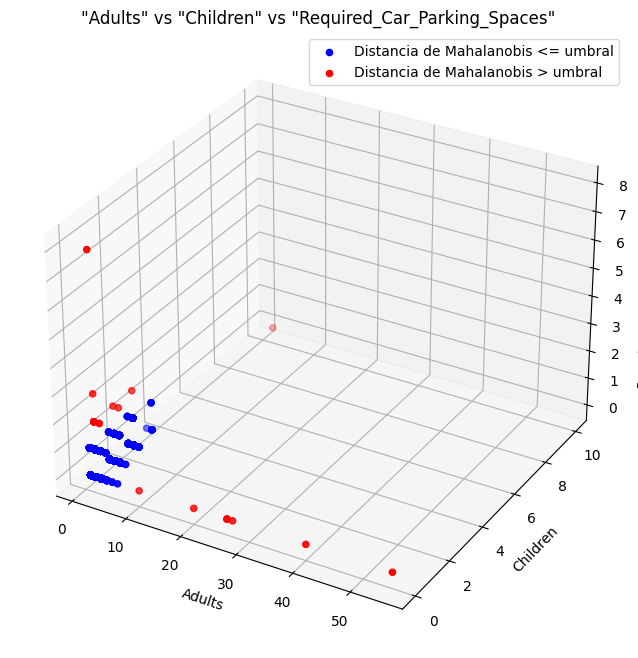

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraemos el valor de las columnas para graficar los puntos
x = mahalanobis_sorted['adults']
y = mahalanobis_sorted['children']
z = mahalanobis_sorted['required_car_parking_spaces']
mahalanobis_values = mahalanobis_sorted['mahalanobis']

# Creamos una máscara para los valores mayores al umbral
mask = mahalanobis_values > umbral

# Dibujamos los valores <= 75
ax.scatter(x[~mask], y[~mask], z[~mask], c='b', marker='o', label='Distancia de Mahalanobis <= umbral')

# Dibujamos los valores > 75
ax.scatter(x[mask], y[mask], z[mask], c='r', marker='o', label='Distancia de Mahalanobis > umbral')

ax.set_xlabel('Adults')
ax.set_ylabel('Children')
ax.set_zlabel('Required Car Parking Spaces')

plt.title('"Adults" vs "Children" vs "Required_Car_Parking_Spaces"')
plt.legend(loc='best')
plt.show()

## **Dataset final**

Finalmente, exportamos el dataset luego de haber hecho todo el analisis del trabajo practico.

In [ ]:
df_copia.to_csv('dataset_final.csv', index=False)